In [1]:
%load_ext autoreload
%autoreload 2

In [98]:
import numpy as np
from tools.readers import SemEvalReader
from tools import utils
from tools import count_based
from tools import pipelines
from tools import analysis
from sklearn.neighbors import *
from scipy.spatial.distance import cosine
import os
import matplotlib.pyplot as plt 


data_folder= '../semeval2020_ulscd_posteval/starting_kit/test_data_public'
storage_folder= '/home/bastien/lscd/static_embdgs/matrices'
language= 'english'
score_folder = './results/scores/'

In [40]:
w = 10
ppmi_alpha = 0.7
ppmi_k = 1
# svd_dim = 300
# svd_niter = 5
# rng_seed = None
# op_func = centerunit

matrix_name = f'count_ws{w}-ppmi_a{ppmi_alpha}_k{ppmi_k}'

In [4]:
reader, folder, corpus1, corpus2, vocabulary = pipelines.prepare_SemEval_data(data_folder, storage_folder, language)
reader.read_targets(language,out=False)

[START] Collecting data
[INFO] Building corpus 1...


Counting words: 0it [00:00, ?it/s]

[INFO] Corpus 1: 253644 sentences                 	86557 words
[INFO] Building corpus 2...


Counting words: 0it [00:00, ?it/s]

[INFO] Corpus 2: 353692 sentences                 	149891 words
[INFO] Number of types: 86557 in C1, 149891 in C2, 33954 shared


In [52]:
ppmi1, ppmi2, vocabulary, word2index = count_based.load_ppmi_matrices_as_csr(storage_folder = folder+'ppmi', vocabulary=vocabulary,
                                                                 matrix_name= f'count_ws{w}/'+matrix_name)

In [58]:
analyser = analysis.Analyser(ppmi1, ppmi2, vocabulary)

In [61]:
analyser.get_nearest_neighbors(5,'face_nn')

(['eye', 'pale', 'her', 'feature', 'cheek'],
 ['eye', 'hair', 'her', 'his', 'cheek'])

In [112]:
distances = reader.predict( ppmi1, ppmi2, word2index, word2index, language, nan_replace=1.0 )

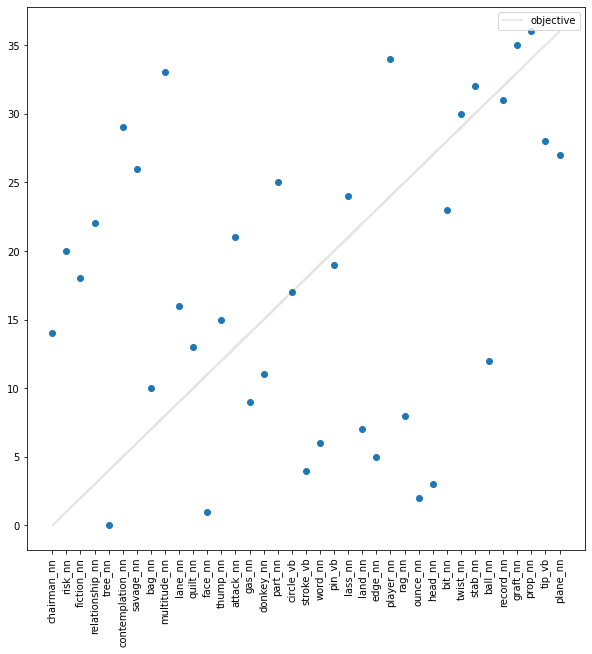

In [116]:
analyser.visual_ranking_errors( reader.targets[language], reader.gold_scores[language], distances )

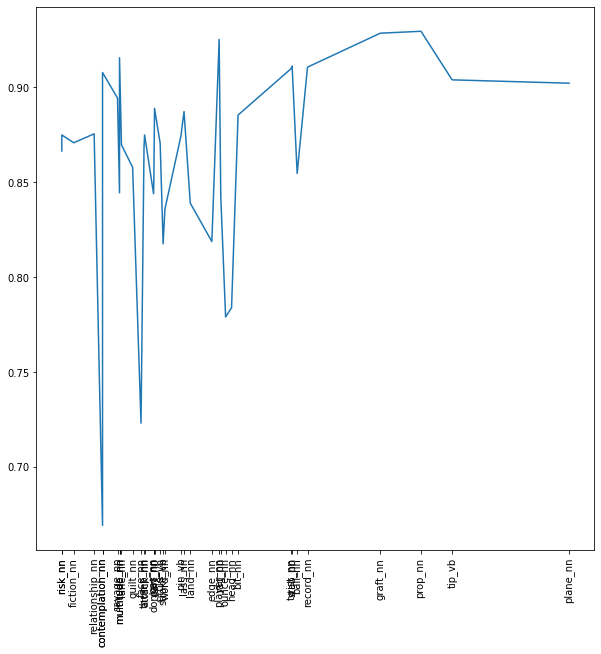

In [122]:
analyser.visual_distances_errors( reader.targets[language], reader.gold_scores[language], distances)